In [1]:
import pencil as pc
import matplotlib.pylab as plt
import matplotlib.colors as colors
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
#settings for plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18})
plt.rc("figure.subplot", left=0.2)
plt.rc("figure.subplot", right=0.95)
plt.rc("figure.subplot", bottom=0.15)
plt.rc("figure.subplot", top=0.90)

In [3]:
ts=pc.read.ts()
#ts.t.shape

Read 8199 lines.


In [4]:

#for exp fitting
def f(t, a, b):
    return a*np.exp(t*b)

i1 = np.argmin(abs(ts.t-400))
j1 = np.argmin(abs(ts.t-1200))

t_exp = ts.t[i1:j1]
b_exp = ts.brms[i1:j1]

popt1, pcov2 = curve_fit(f, t_exp, b_exp, [0,0.0016])

t_fit1 = ts.t[i1-100:j1+100]
b_fit1 = f(t_fit1, popt1[0], popt1[1])
grow=round(popt1[1],3)
print('grow factor is', grow)

#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-2000))
j2 = np.argmin(abs(ts.t-3100))

t_lin = ts.t[i2:j2]
b_lin = ts.brms[i2:j2]

popt2, pcov2 = curve_fit(g, t_lin, b_lin)

t_fit2 = ts.t[i2-300:j2+100]
b_fit2 = g(t_fit2, popt2[0], popt2[1])
b_ave = round(np.average(b_fit2),3)
print(r'$\langle B_{rms}\rangle$=', b_ave)

#for urms
i3 = np.argmin(abs(ts.t-2000))
j3 = np.argmin(abs(ts.t-3100))

t_lin = ts.t[i3:j3]
u_lin = ts.urms[i3:j3]

popt2, pcov2 = curve_fit(g, t_lin, u_lin)

t_fit3 = ts.t[i3-300:j3+100]
u_fit3 = g(t_fit3, popt2[0], popt2[1])
u_ave = round(np.average(u_fit3),3)
print(r'$\langle u_{rms}\rangle$=', u_ave)

grow factor is 0.002


ValueError: `ydata` must not be empty!

NameError: name 'b_ave' is not defined

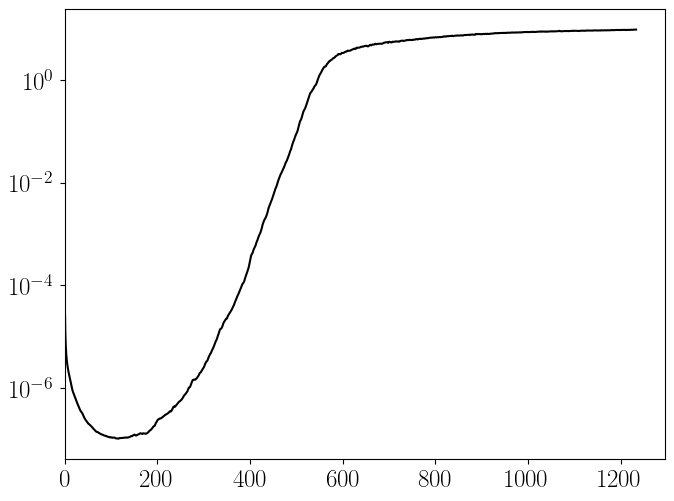

In [5]:
plt.figure(figsize=(8,6))

plt.plot(ts.t, ts.brms, label = 'df', color='black')
# plt.plot(t_fit1, b_fit1, linewidth=2.5, linestyle = '--', color='r')
# plt.plot(t_fit2, b_fit2, linewidth=2.5, linestyle = '--', color='b')

plt.yscale("log")
plt.xlim(0,)
# plt.xlim(0,3200)
plt.text(2500,0.1, fr"$B_{{rms}}\approx{b_ave}$", fontsize=16)
plt.text(1050,0.0008, fr"$e^{{{grow}t}}$", fontsize=20)
plt.annotate("exponential growth", xy=(760, 0.0003), xytext=(700, 0.00002), arrowprops=dict(arrowstyle="->"))
plt.annotate("saturation", xy=(2100, 0.35), xytext=(2100, 0.02), arrowprops=dict(arrowstyle="->"))
plt.xlabel('t')
plt.ylabel(r'$B_{rms}$')
plt.legend()
#plt.grid()
plt.tight_layout()
#plt.savefig('fitted.jpg')
plt.show()

NameError: name 't_fit3' is not defined

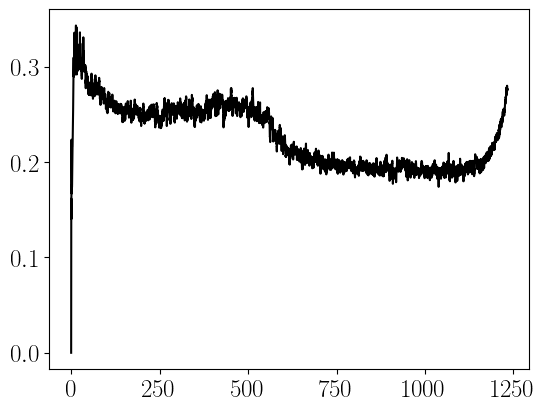

In [6]:

plt.plot(ts.t, ts.urms, label = 'df', color='black')
plt.plot(t_fit3, u_fit3, linewidth=2.5, linestyle = '--', color='b')
plt.xlim(2000,3000)
#plt.ylim(0)
plt.yscale('log')
plt.show()

In [7]:
#reading the xy_aver file
xya=pc.read.aver(plane_list=['xy'])
bxmz=xya.xy.bxmz
bymz=xya.xy.bymz
by = [bxmz, bymz]

#reading the grid
grid = pc.read.grid(trim=True)
z = grid.z

reading grid data from processor 27 of 32 ...
reading grid data from processor 19 of 32 ...
reading grid data from processor 30 of 32 ...
reading grid data from processor 5 of 32 ...
reading grid data from processor 1 of 32 ...
reading grid data from processor 2 of 32 ...
reading grid data from processor 31 of 32 ...
reading grid data from processor 14 of 32 ...
reading grid data from processor 20 of 32 ...
reading grid data from processor 12 of 32 ...
reading grid data from processor 0 of 32 ...
reading grid data from processor 4 of 32 ...
reading grid data from processor 6 of 32 ...
reading grid data from processor 10 of 32 ...
reading grid data from processor 26 of 32 ...
reading grid data from processor 9 of 32 ...
reading grid data from processor 7 of 32 ...
reading grid data from processor 8 of 32 ...
reading grid data from processor 3 of 32 ...
reading grid data from processor 23 of 32 ...
reading grid data from processor 25 of 32 ...
reading grid data from processor 16 of 32 ..

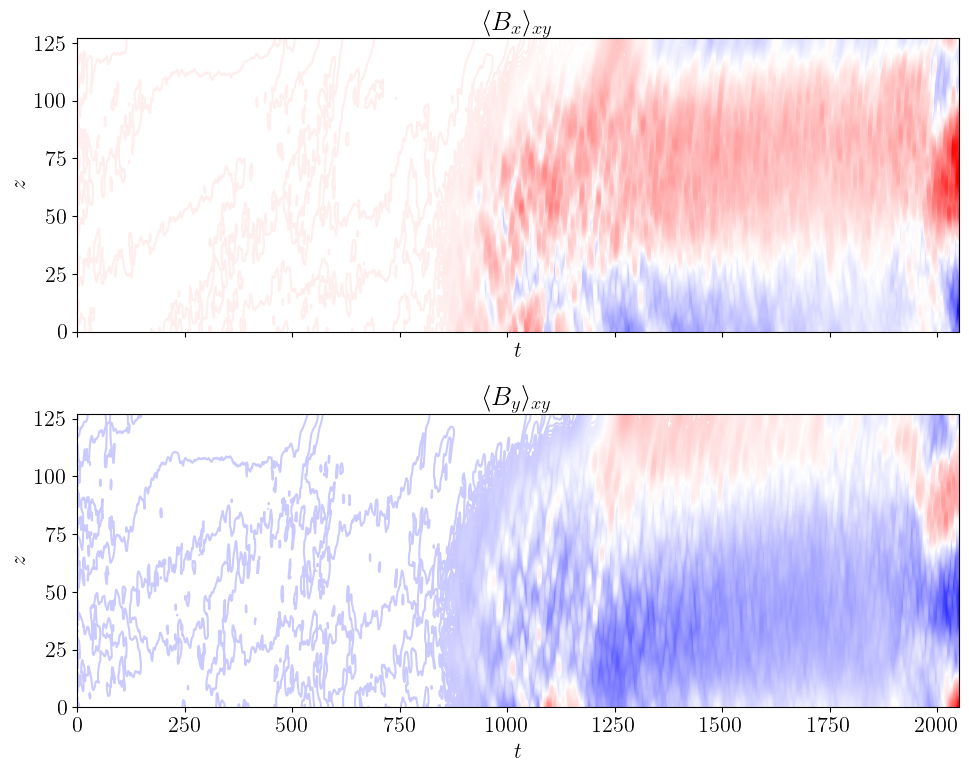

In [23]:
fig, axs = plt.subplots(2,1, figsize=(10,8), sharex=True)
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True
plt.rc("figure.subplot", left=0.2)
plt.rc("figure.subplot", right=0.95)
plt.rc("figure.subplot", bottom=0.15)
plt.rc("figure.subplot", top=0.90)

for i in range(len(axs.flat)):
    ims = axs[i].contour(np.transpose(by[i]),500,cmap='bwr')

#axs[0].contour(np.transpose(bxmz),50,cmap='bwr')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$z$')
axs[0].set_title(r'$\langle B_x \rangle _{xy}$')
axs[0].set_xlim(0,)

#axs[1].contour(np.transpose(bymz),50,cmap='bwr')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$z$')
axs[1].set_title(r'$\langle B_y \rangle _{xy}$')
axs[1].set_xlim(0,)

#cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
#fig.colorbar(ims, cax=cbar_ax)
plt.tight_layout()
#plt.savefig('ave.jpg')
plt.show()

In [9]:
#reading the var file
var = pc.read.var(magic=["bb","pp"], trimall=True)

In [10]:
#calculating pressure profile by averaging the var file in xy plane
pressure = np.average(var.pp, axis=(-1,-2))

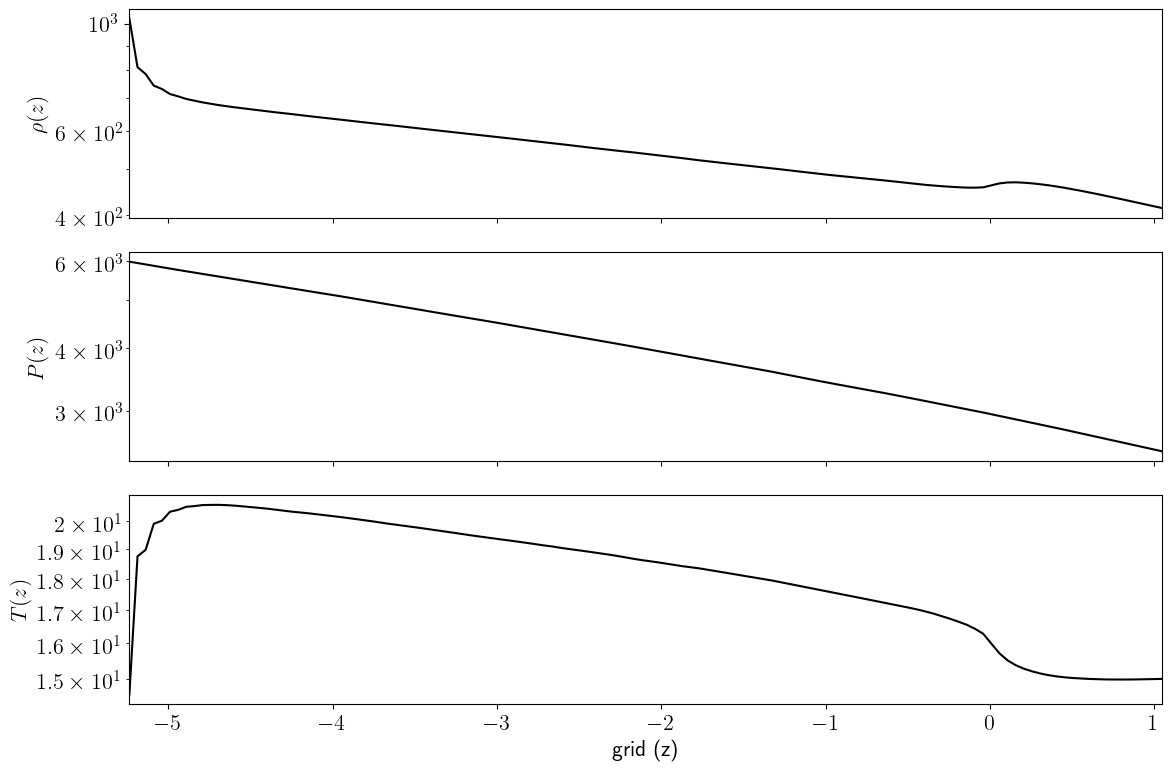

In [11]:
rho = xya.xy.rhomz[-1,:]
#pre = xya.xy.ppmz[-1,:]
temp = xya.xy.TTmz[-1,:]

l=-5*2*np.pi/6
u=2*np.pi/6

fig, axs = plt.subplots(3,1, figsize=(12,8), sharex=True)

axs[0].plot(grid.z, rho, color='k')
axs[1].plot(grid.z, pressure, color='k')
axs[2].plot(grid.z, temp, color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

axs[0].set_xlim(l, u)
axs[1].set_xlim(l, u)
axs[2].set_xlim(l, u)

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")


plt.xlabel("grid (z)")
plt.tight_layout()
#plt.savefig("variation.jpg")

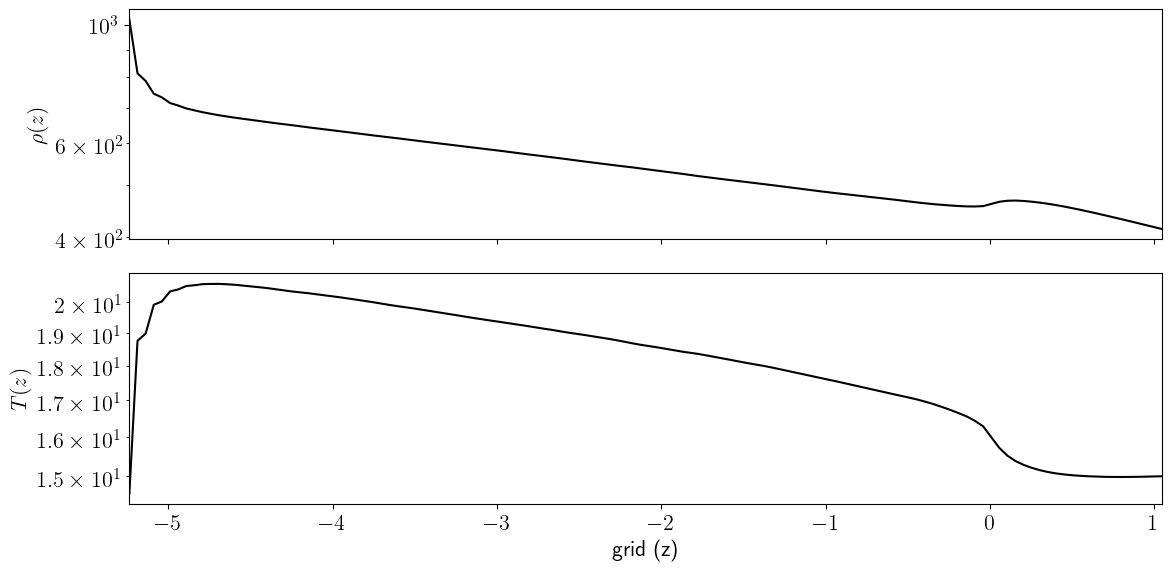

In [12]:
rho = xya.xy.rhomz[-1,:]
pre = xya.xy.ppmz[-1,:]
temp = xya.xy.TTmz[-1,:]

fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)
#plt.rcParams.update({'font.size': 12})
l=-5*2*np.pi/6
u=2*np.pi/6
axs[0].plot(grid.z, rho, color='k')
#axs[1].plot(grid.z, pre, color='k')
axs[1].plot(grid.z, temp, color='k')

axs[0].set_yscale("log")
#axs[1].set_yscale("log")
axs[1].set_yscale("log")

axs[0].set_xlim(l, u)
#axs[1].set_xlim(l, u)
axs[1].set_xlim(l, u)

axs[0].set_ylabel(r"$\rho(z)$")
#axs[1].set_ylabel(r"$P(z)$")
axs[1].set_ylabel(r"$T(z)$")


plt.xlabel("grid (z)")
plt.tight_layout()
#plt.savefig("variation2.jpg")

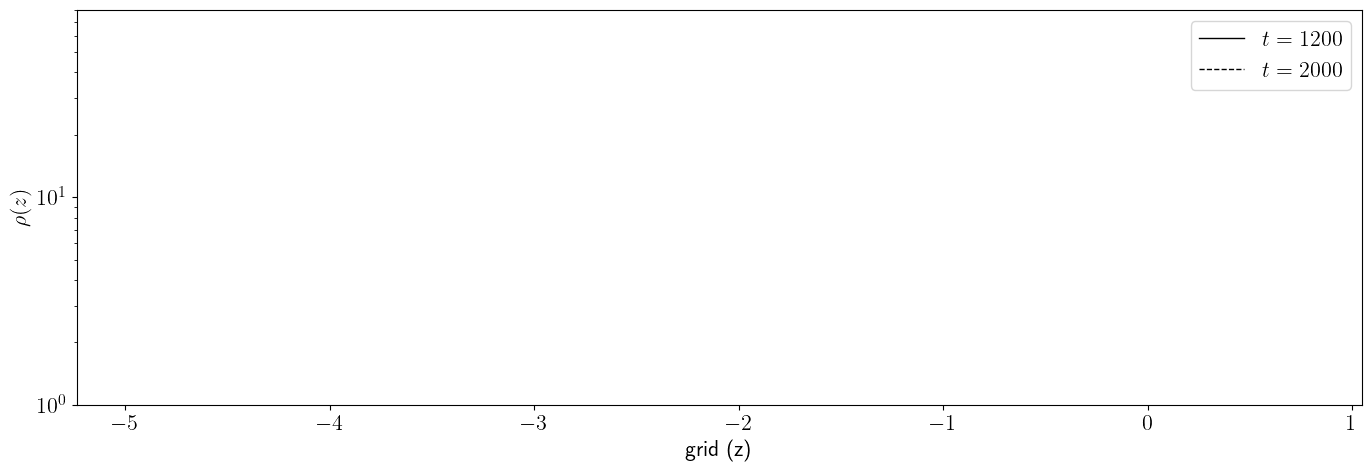

In [13]:
lr = len(xya.xy.rhomz[:,1])

lis = ['-','--','-.',':','-']
lw = [1,1,1,1,2]
l=-5*2*np.pi/6
u=2*np.pi/6

fig, axs = plt.subplots(figsize=(14,5))
j=0
for i in range(1200,lr,800):
    plt.plot(grid.z, xya.xy.rhomz[i,:], linestyle=lis[j], linewidth=lw[j], color="k", label=fr"$t={i}$")
    j = j+1

plt.yscale("log")
plt.xlim(l, u)
plt.ylim(1, 8*10)
plt.xlabel(r"grid (z)")
plt.ylabel(r"$\rho(z)$")
plt.legend()
plt.tight_layout()
#plt.savefig("den_vari.jpg")

In [14]:
bx_1 = bxmz[800:900,:]
bx_2 = bxmz[2200:2250,:]
bx_3 = bxmz[4000:4100,:]

by_1 = bymz[800:900,:]
by_2 = bymz[2200:2250,:]
by_3 = bymz[4000:4100,:]


bxave_1 = np.average(bx_1, axis=0)
bxave_2 = np.average(bx_2, axis=0)
bxave_3 = np.average(bx_3, axis=0)

byave_1 = np.average(by_1, axis=0)
byave_2 = np.average(by_2, axis=0)
byave_3 = np.average(by_3, axis=0)

#bxave_3.shape

/mnt/home/student/cmondal/miniconda3/envs/env_pencil/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/mnt/home/student/cmondal/miniconda3/envs/env_pencil/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide



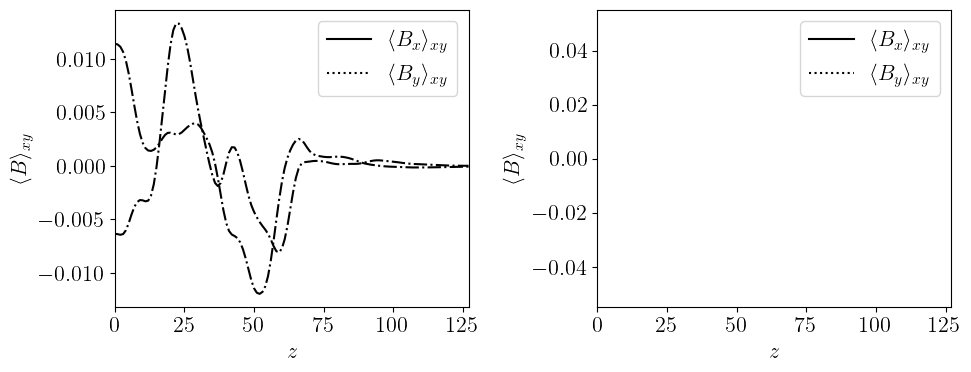

In [15]:
l=-5*2*np.pi/6
u=2*np.pi/6

fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(bxave_1[:], color="k", ls="-.")
axs[0].plot(bxave_3[:], color="k", ls="-", label=r'$\langle B_x \rangle _{xy}$')#label="t=4000")
axs[1].plot(bxave_2[:], color="k", ls="-", label=r'$\langle B_x \rangle _{xy}$')#label="t=2200")
axs[0].plot(byave_1[:], color="k", ls="-.",)# label="t=1000")
axs[0].plot(byave_3[:], color="k", ls=":", label=r'$\langle B_y \rangle _{xy}$')#label="t=4000")
axs[1].plot(byave_2[:], color="k", ls=":", label=r'$\langle B_y \rangle _{xy}$')#label="t=2200")

axs[0].legend()
axs[1].legend()
axs[0].set_xlim(0, 127)
axs[1].set_xlim(0, 127)
axs[0].set_xlabel(r'$z$')
axs[0].set_ylabel(r'$\langle B \rangle_{xy}$')
axs[1].set_xlabel(r'$z$')
axs[1].set_ylabel(r'$\langle B \rangle_{xy}$')
axs[0].set_xticks(np.arange(0, 127, step=25))
axs[1].set_xticks(np.arange(0, 127, step=25))

plt.tight_layout()
#plt.savefig('comp.jpg')

In [16]:
n = len(grid.z)
dz=z[21]-z[20]
dz*n

6.33270263671875

In [17]:
#calculating Fourier transform
n = len(grid.z)
fhat = np.fft.fft(bxave_2,n)
PSD = fhat*np.conj(fhat)/n
#freq = (1/(dz*n))*np.arange(n)
wn = 2*np.pi*np.fft.fftfreq(n, dz)
L = np.arange(0,np.floor(n/2), dtype="int")


(0.0, 64.0)

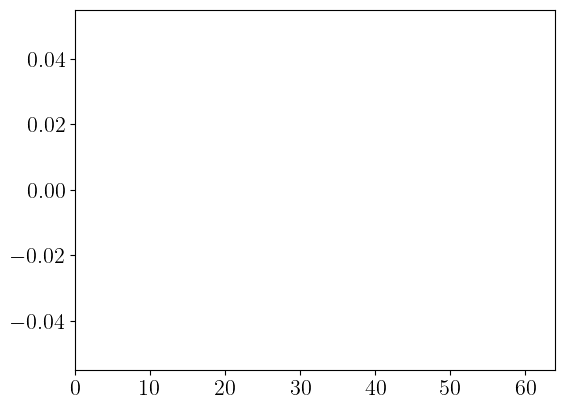

In [18]:
#in k-space
plt.plot(wn[L], PSD.real[L])
plt.xlim(0,64)

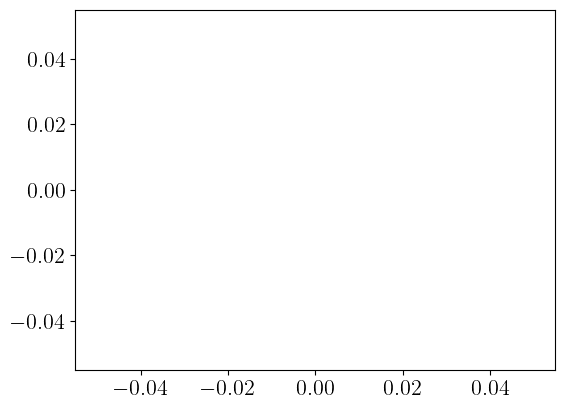

In [19]:
plt.plot(z,-bxave_2[25]*np.cos(wn[1]*z))
plt.plot(z,bxave_2)
plt.show()

In [20]:
#calculating k_max
ind = np.argmax(PSD[L].real)
#ind * 1/(dz*n)
wn[ind]

0.0

/mnt/home/student/cmondal/miniconda3/envs/env_pencil/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/mnt/home/student/cmondal/miniconda3/envs/env_pencil/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



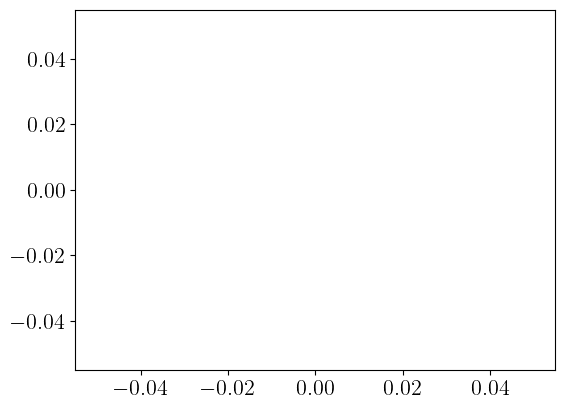

In [21]:
#taking inverse transformation
y = np.fft.ifft(fhat)
plt.plot(y)

In [22]:
#reading var files
var1 = pc.read.var('VAR1', magic=["bb"], trimall=True)
var2 = pc.read.var('VAR10', magic=["bb"], trimall=True)
var3 = pc.read.var('VAR20', magic=["bb"], trimall=True)
var4 = pc.read.var('VAR35', magic=["bb"], trimall=True)
var5 = pc.read.var('VAR45', magic=["bb"], trimall=True)
var6 = pc.read.var('VAR60', magic=["bb"], trimall=True)

KeyboardInterrupt: 

In [ ]:
#for legends
var_t = np.empty([6])
for i in range(1,7):
    exec(f'var_t[i-1] = round(var{i}.t,2)')
var_t

array([  50.,  500., 1000., 1750., 2250., 3000.])

/tmp/ipykernel_2460451/882388676.py:13: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



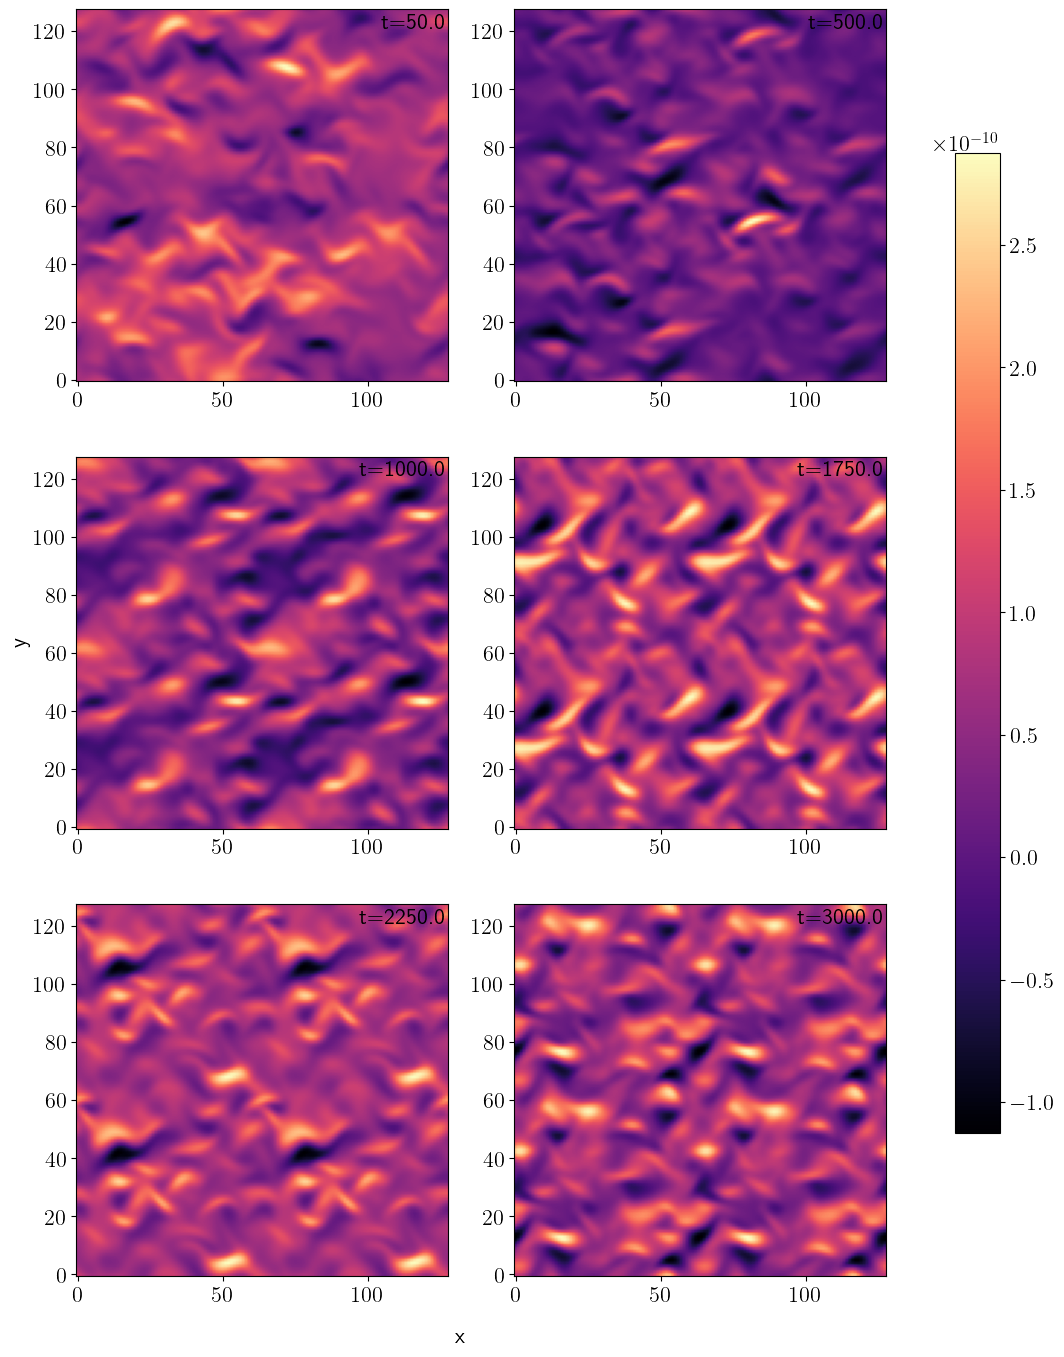

In [ ]:
#plotting different snapshots of xy plane
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9,14))

for i in range(len(axes.flat)):
    exec(f'axes.flat[{i}].imshow(var{i+1}.bb[0,10,:,:], origin="lower", cmap="magma")')
    axes.flat[i].text(0.99,0.99, f't={var_t[i]}', transform=axes.flat[i].transAxes, va='top', ha='right', fontsize='16')
im = axes.flat[-1].imshow(var6.bb[0,10,:,:], origin="lower", cmap="magma")
fig.text(0.5, 0.00, 'x', ha='center')
fig.text(0.00, 0.5, 'y', va='center', rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.tight_layout()
#plt.savefig('slices.jpg', dpi=100)
plt.show()

/tmp/ipykernel_2460451/3854966665.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



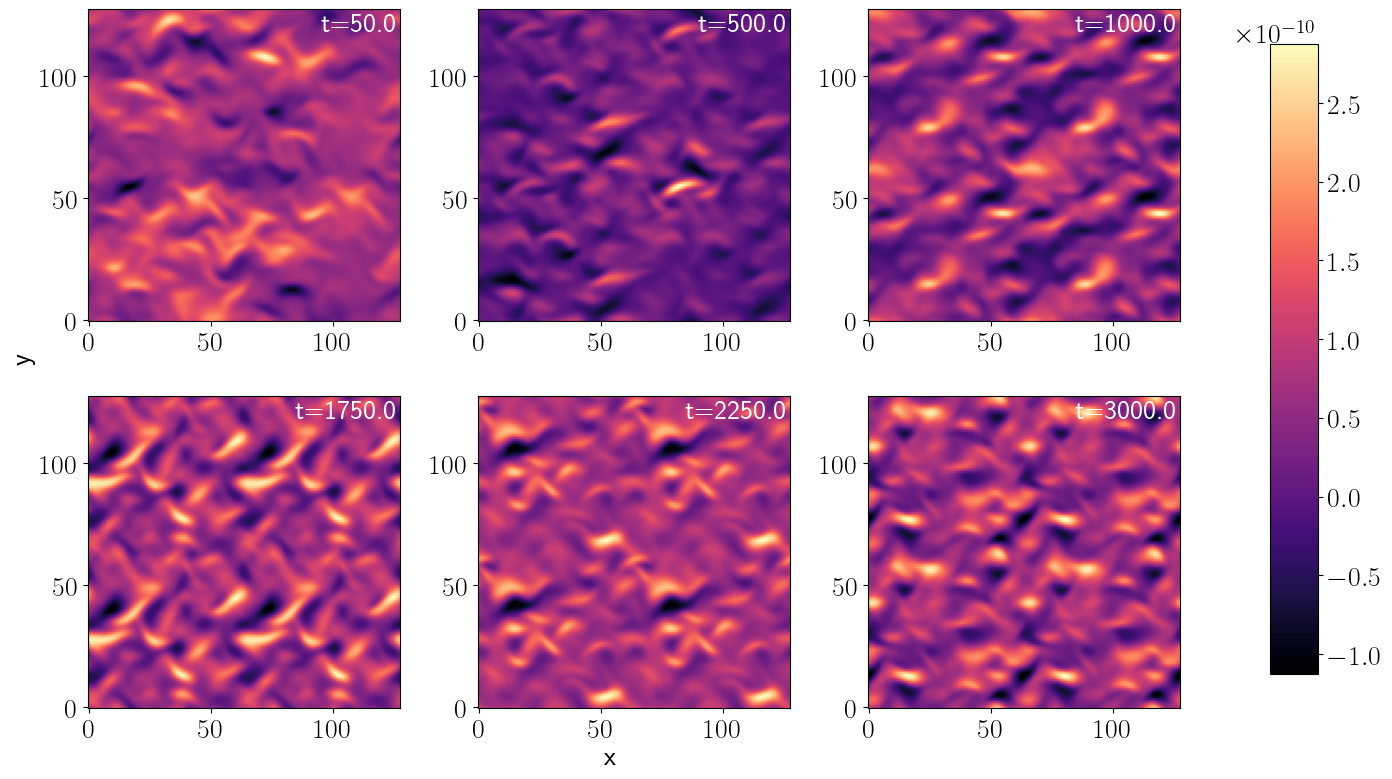

In [ ]:
#plotting different snapshots of xy plane for presentation

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,9))

for i in range(len(axes.flat)):
    exec(f'axes.flat[{i}].imshow(var{i+1}.bb[0,10,:,:], origin="lower", cmap="magma")')
    axes.flat[i].text(0.99,0.99, f't={var_t[i]}', transform=axes.flat[i].transAxes, va='top', ha='right', fontsize='20', color='w', fontweight='bold')
im = axes.flat[-1].imshow(var6.bb[0,10,:,:], origin="lower", cmap="magma")
fig.text(0.5, 0.05, 'x', ha='center')
fig.text(0.00, 0.5, 'y', va='center', rotation='vertical')
fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([1.05, 0.15, 0.04, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.tight_layout()
#plt.savefig('slices_h.jpg', dpi=100)
plt.show()

/tmp/ipykernel_2460451/3984420069.py:13: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



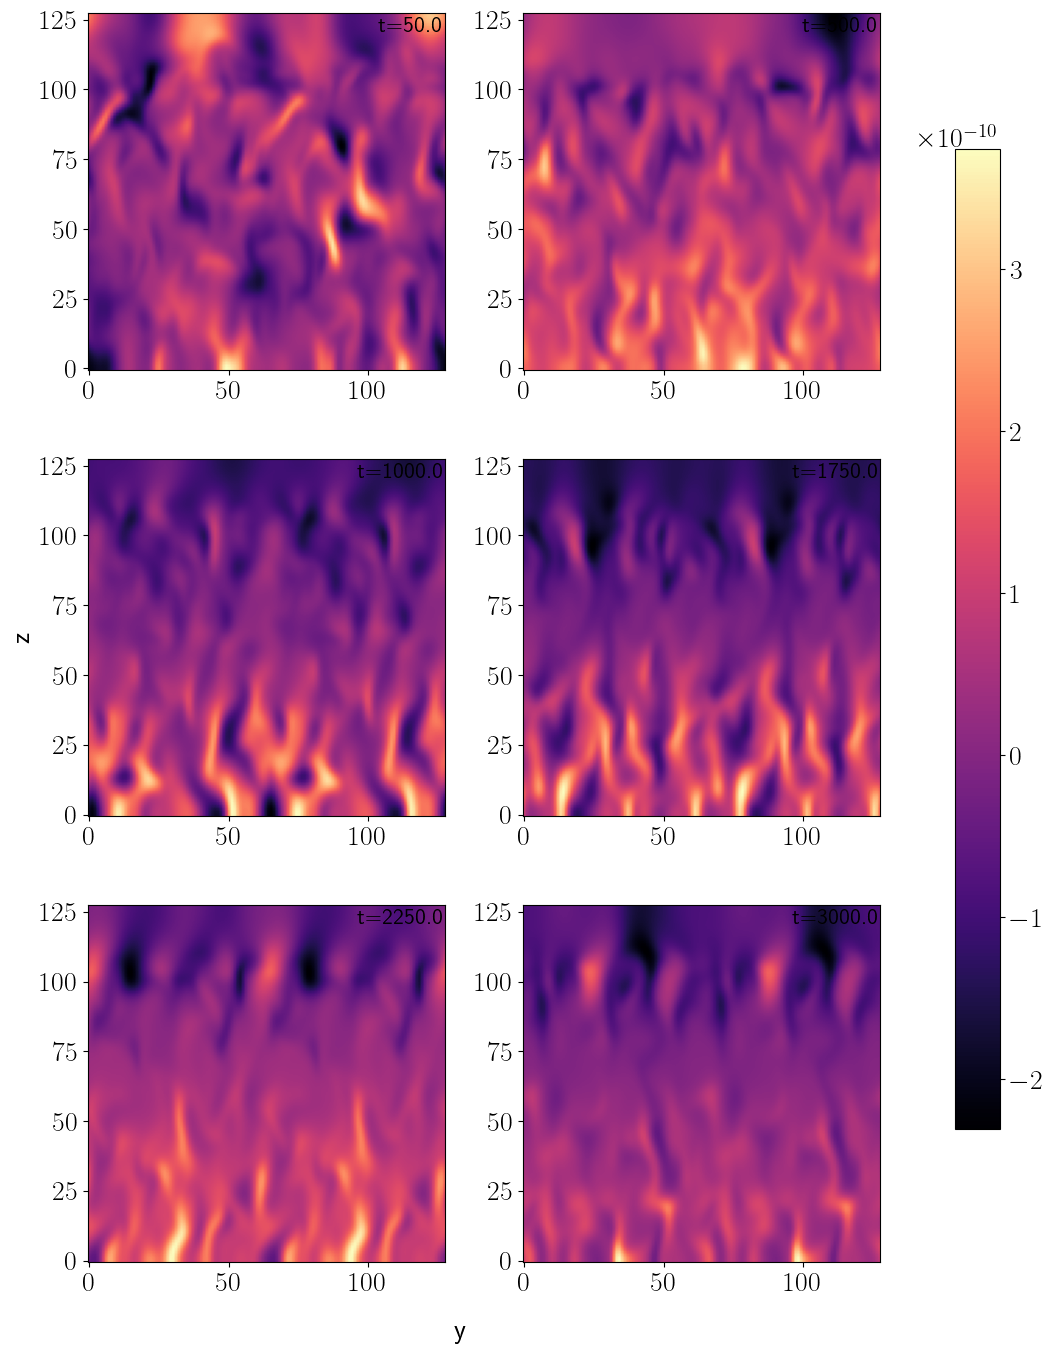

In [ ]:
#same for yz plane
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9,14))

for i in range(len(axes.flat)):
    exec(f'axes.flat[{i}].imshow(var{i+1}.bb[0,:,:,100], origin="lower", cmap="magma")')
    axes.flat[i].text(0.99,0.99, f't={var_t[i]}', transform=axes.flat[i].transAxes, va='top', ha='right', fontsize='16')
im = axes.flat[-1].imshow(var6.bb[0,:,:,100], origin="lower", cmap="magma")
fig.text(0.5, 0.00, 'y', ha='center')
fig.text(0.00, 0.5, 'z', va='center', rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.tight_layout()
#plt.savefig('slices.jpg', dpi=100)
plt.show()

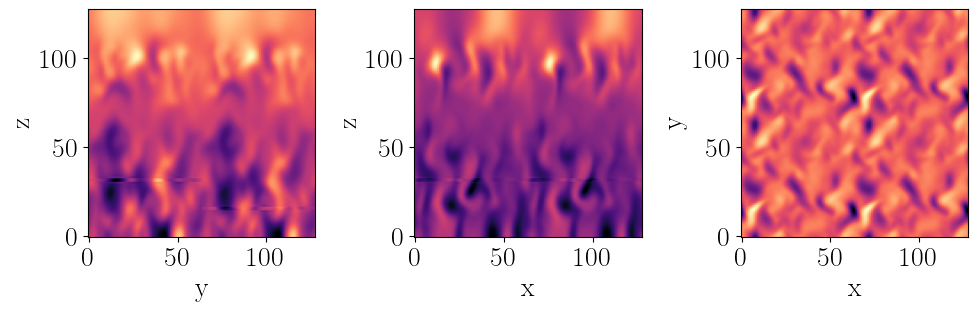

In [ ]:
#snapshot of different planes
fig, axs = plt.subplots(1,3, figsize=(10,15))
plt.rcParams.update({'font.size': 14})
plt.rcParams['text.usetex'] = True
plt.rc('font', family='arial')
plt.rc("figure.subplot", left=0.2)
plt.rc("figure.subplot", right=0.95)
plt.rc("figure.subplot", bottom=0.15)
plt.rc("figure.subplot", top=0.90)

axs[0].imshow(var.bb[1,:,:,63], origin="lower", cmap="magma")
axs[1].imshow(var.bb[1,:,63,:], origin="lower", cmap="magma")
axs[2].imshow(var.bb[1,63,:,:], origin="lower", cmap="magma")

axs[0].set_xlabel('y')
axs[1].set_xlabel('x')
axs[2].set_xlabel('x')

axs[0].set_ylabel('z')
axs[1].set_ylabel('z')
axs[2].set_ylabel('y')

plt.tight_layout()

In [ ]:
power = pc.read.power()

poweruz_xy.dat


In [ ]:
power.keys()

t
kx
ky
zpos
nzpos
uz_xy
